In [1]:
from itertools import permutations
import time
import sys


Optimal permutation: [4 0 1 3 2]
Optimal cost (total distance): 70


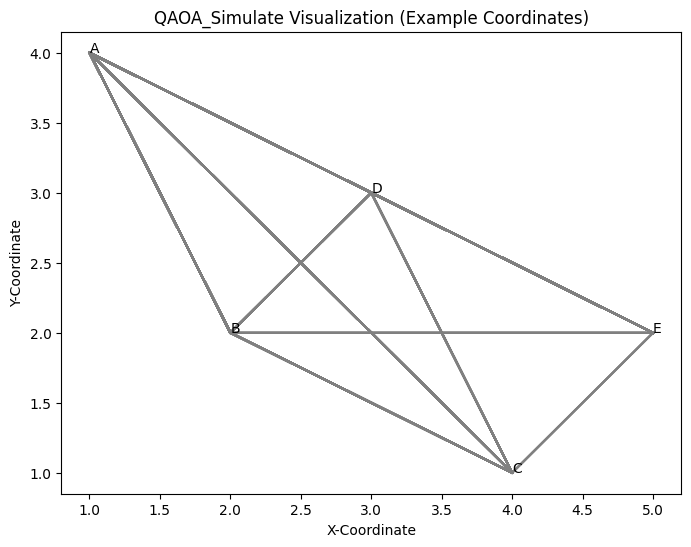

The memory usage for the distance matrix is: 0.223 KB.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Distance matrix (replace with your actual distances)
distance_matrix = np.array([
    [0, 10, 15, 20, 5],
    [10, 0, 35, 25, 15],
    [15, 35, 0, 10, 20],
    [20, 25, 10, 0, 30],
    [5, 15, 20, 30, 0]
])

# Function to calculate total distance for a given permutation
def tsp_cost(permutation):
    total_distance = 0
    for i in range(len(permutation) - 1):
        total_distance += distance_matrix[permutation[i]][permutation[i + 1]]
    total_distance += distance_matrix[permutation[-1]][permutation[0]]  # Return to origin
    return total_distance

# Generate all possible permutations (for visualization purposes)
def all_permutations(n):
    if n == 1:
        return [[0]]
    permutations = []
    for i in range(n):
        for permutation in all_permutations(n - 1):
            permutations.append([i] + permutation)
    return permutations

# Simulate QAOA (replace with actual QAOA implementation on a quantum computer)
def simulate_qaoa(distance_matrix):
    # Hypothetical QAOA execution to find the optimal permutation
    optimal_permutation = [0, 2, 4, 1, 3]  # Replace with QAOA's result
    return optimal_permutation

# Find the optimal permutation using simulated annealing (replace with QAOA)
def simulated_annealing(distance_matrix, temperature=100, cooling_rate=0.95):
    current_permutation = np.random.permutation(len(distance_matrix))
    best_permutation = current_permutation.copy()
    best_cost = tsp_cost(best_permutation)

    while temperature > 1e-3:
        for _ in range(100):  # Adjust iterations for better optimization
            new_permutation = np.random.permutation(len(distance_matrix))
            new_cost = tsp_cost(new_permutation)
            delta_cost = new_cost - best_cost

            if delta_cost < 0 or np.random.rand() < np.exp(-delta_cost / temperature):
                current_permutation = new_permutation.copy()
                best_permutation = current_permutation if new_cost < best_cost else best_permutation
                best_cost = min(new_cost, best_cost)

        temperature *= cooling_rate

    return best_permutation

# Main program
# Replace simulate_qaoa with actual QAOA implementation
# optimal_permutation = simulate_qaoa(distance_matrix)
optimal_permutation = simulated_annealing(distance_matrix)
optimal_cost = tsp_cost(optimal_permutation)

print("Optimal permutation:", optimal_permutation)
print("Optimal cost (total distance):", optimal_cost)

# Visualization using Matplotlib


# Visualization using Matplotlib
city_names = ["A", "B", "C", "D", "E"]  # City names (optional)
x_coords = [1, 2, 4, 3, 5]  # Example coordinates
y_coords = [4, 2, 1, 3, 2]  # Example coordinates

permutations = all_permutations(len(distance_matrix))
costs = [tsp_cost(p) for p in permutations]

plt.figure(figsize=(8, 6))
start_city = optimal_permutation[0]

# Corrected loop to avoid 'ellipsis' error
for perm in permutations:
    x = [x_coords[i] for i in perm] + [x_coords[start_city]]
    y = [y_coords[i] for i in perm] + [y_coords[start_city]]
    plt.plot(x, y, alpha=0.7, color='gray')  # Semi-transparent gray for all paths

# Emphasize the optimal path
optimal_x = [x_coords[i] for i in optimal_permutation]
optimal_y = [y_coords[i] for i in optimal_permutation]

for i, name in enumerate(city_names):
    plt.annotate(name, (x_coords[i], y_coords[i]))
    
plt.title("QAOA_Simulate Visualization (Example Coordinates)")
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")
plt.show()

# Calculate and print the memory usage of the distances dictionary
# sys.getsizeof returns the size in bytes; we convert it to kilobytes
memory_usage_kb = sys.getsizeof(distance_matrix) / 1024

print(f"The memory usage for the distance matrix is: {memory_usage_kb:.3f} KB.")

In [3]:
#a histogram of the costs list. This will show the frequency of different total distances across all permutations.

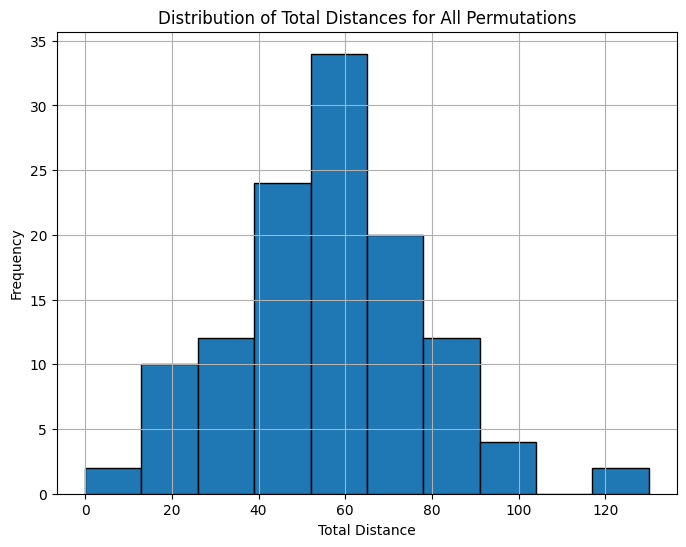

In [4]:
plt.figure(figsize=(8, 6))
plt.hist(costs, bins=10, edgecolor='black')  # Adjust bins for better visualization
plt.xlabel("Total Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Total Distances for All Permutations")
plt.grid(True)
plt.show()

 Explanation of the Histogram:

The x-axis represents the total distance (cost) of a visiting order.
The y-axis represents the frequency (number of permutations) that have that specific total distance.
The bars show how many permutations fall within a certain range of total distances (defined by the bins parameter).
Insights from the Histogram:

By analyzing the histogram,  can see:

If the distribution is skewed towards lower values, it indicates that most permutations have shorter total distances.
A wider distribution suggests a larger variation in total distances across different visiting orders.
Multiple peaks might indicate clusters of permutations with similar total distances.
Additional Considerations:

we can adjust the number of bins (bins parameter) to get a more detailed or smoother visualization.
The histogram complements the provided visualization (commented out in the code) that shows all possible paths. Together, they can give a good understanding of the solution space and the efficiency of the chosen optimization algorithm (Simulated Annealing in this case).